In [1]:
import numpy as np

In [2]:
class MaxHeap:

    def __init__(self, capacity):
        self.heap = np.zeros(capacity, dtype='int')
        self.size = 0
        
    def insert(self, elem):
        if self.size == len(self.heap):
            print("হায়রে গরিব জায়গা নাই")
        else:
            self.heap[self.size] = elem
            self.swim(self.size)
            self.size += 1

    def swim(self, i):
        if i>0:
            parent = (i-1)//2
            if self.heap[i] > self.heap[parent]:
                self.heap[i],self.heap[parent] = self.heap[parent],self.heap[i]
                self.swim(parent)

    def extract(self):
        if self.size == 0:
            return
        max_val = self.heap[0]
        self.heap[0] = self.heap[self.size-1]
        self.sink(0)
        self.size -= 1
        return max_val
    
    def sink(self, i):
        if (i*2)+1 >= self.size:
            return
        left_child = 2*i +1
        right_child = 2*i +2
        replace_child = 0
        if right_child >= self.size:
            replace_child = left_child
        elif self.heap[left_child] >= self.heap[right_child]:
            replace_child = left_child
        else:
            replace_child = right_child
        if self.heap[i] < self.heap[replace_child]:
            self.heap[i],self.heap[replace_child] = self.heap[replace_child],self.heap[i]
            self.sink(replace_child)

    def ascending_sort(self):
        temp = self.size
        for i in range(temp):
            self.heap[self.size] = self.extract()
        self.size = temp
        return self.heap

    def __str__(self):
        return f"{self.heap}"

heap = MaxHeap(10)
heap.insert(15)
print(heap)
heap.insert(100)
print(heap)
heap.insert(50)
print(heap)
heap.insert(30)
print(heap)
heap.extract()
print(heap)
heap.insert(35)
print(heap)
heap.ascending_sort()
print(heap)




[15  0  0  0  0  0  0  0  0  0]
[100  15   0   0   0   0   0   0   0   0]
[100  15  50   0   0   0   0   0   0   0]
[100  30  50  15   0   0   0   0   0   0]
[50 30 15 15  0  0  0  0  0  0]
[50 35 15 30  0  0  0  0  0  0]
[15 30 35 50  0  0  0  0  0  0]


In [3]:
class MinHeap:

    def __init__(self, capacity):
        self.heap = np.zeros(capacity, dtype = int)
        self.size = 0

    def insert(self, elem):
        if self.size == len(self.heap):
            print("nigga just ran out of space")
        else:
            self.heap[self.size] = elem
            self.swim(self.size)
            self.size +=1
            
    def swim(self, i):
        if i>0:
            parent = (i-1)//2
            if self.heap[i] < self.heap[parent]:
                self.heap[i],self.heap[parent] = self.heap[parent],self.heap[i]
                self.swim(parent)
        
    def extract(self):
        if self.size == 0:
            return
        min_val = self.heap[0]
        self.heap[0] = self.heap[self.size-1]
        self.sink(0)
        self.size -= 1
        return min_val
    
    def sink(self, i):
        if (i*2)+1 >= self.size:
            return
        lc = 2*i + 1
        rc = 2*i + 2
        replace_index = 0
        if rc >= self.size:
            replace_index = lc
        elif self.heap[lc] < self.heap[rc]:
            replace_index = lc
        else:
            replace_index = rc
        if self.heap[i] > self.heap[replace_index]:
            self.heap[i],self.heap[replace_index] = self.heap[replace_index],self.heap[i]
            self.sink(replace_index)

    def descending_sort(self):
        temp = self.size
        for i in range(temp):
            self.heap[self.size] = self.extract()
        self.size = temp


    def __str__(self):
        return f"{self.heap}"

heap = MinHeap(10)
heap.insert(15)
print(heap)
heap.insert(100)
print(heap)
heap.insert(50)
print(heap)
heap.insert(30)
print(heap)
heap.extract()
print(heap)
heap.insert(35)
print(heap)
heap.descending_sort()
print(heap)
        
        

            

[15  0  0  0  0  0  0  0  0  0]
[ 15 100   0   0   0   0   0   0   0   0]
[ 15 100  50   0   0   0   0   0   0   0]
[ 15  30  50 100   0   0   0   0   0   0]
[ 30 100  50 100   0   0   0   0   0   0]
[ 30  35  50 100   0   0   0   0   0   0]
[100  50  35  30   0   0   0   0   0   0]


<span style="font-family:Consolas,monospace">
Minimum sum of two numbers formed from digits of an array

Given an array of digits (values are from 0 to 9), find the minimum possible sum of two numbers formed from digits of the array. All digits of given array must be used to form the two numbers.</span>

Examples: 

<span style="color:#B2EBF2; font-family:Consolas,monospace; font-style:italic">
**Input**: arr[] = [6, 8, 4, 5, 2, 3]

Output: 604

Explanation: The minimum sum is formed by numbers 358 and 246

**Input**: arr[] = [5, 3, 0, 7, 4]

Output: 82

Explanation: The minimum sum is formed by numbers 35 and 047 </span>



In [4]:
def min_sum(arr):
    heap = MaxHeap(len(arr))
    for i in arr:
        heap.insert(i)
    heap.ascending_sort()
    num1 = ""
    num2 = ""
    for i in range(len(arr)):
        if i%2 == 0:
            num1+=str(heap.heap[i])
        else:
            num2+=str(heap.heap[i])
    return int(num1)+int(num2)

print(min_sum([6,8,4,5,2,3]))
print(min_sum([5,3,0,7,4]))

604
82


Given an array arr[] of N distinct elements and a number K, where K is smaller than the size of the array. Find the K’th smallest element in the given array.

Examples:

Input: arr[] = [7, 10, 4, 3, 20, 15], K = 3 

Output: 7


Input: arr[] = [7, 10, 4, 3, 20, 15], K = 4 

Output: 10 

In [5]:
def kth_smallest_element(arr,k):
    maxheap = MaxHeap(len(arr))
    for i in arr:
        maxheap.insert(i)
    maxheap.ascending_sort()
    return maxheap.heap[k-1]
print(kth_smallest_element([7, 10, 4, 3, 20, 15],3))

7


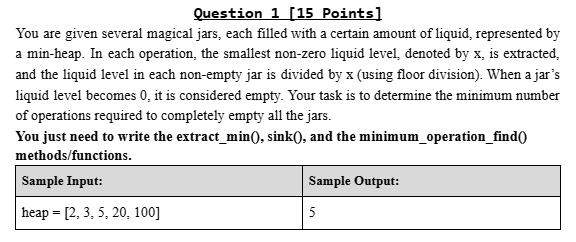

In [10]:
def minimum_operations_find(initial_heap):
    # Create a min-heap from the initial array
    heap = MinHeap(len(initial_heap))
    for num in initial_heap:
        if num > 0:  # Only insert non-zero values
            heap.insert(num)
    
    operations = 0
    
    while not heap.size == 0:
        # Extract the minimum non-zero value
        x = heap.extract()
        if x is None or x == 0:
            break
        
        operations += 1
        
        # Temporary array to store modified values
        temp = []
        remaining_size = heap.size
        
        # Process all remaining elements in the heap
        for _ in range(remaining_size):
            val = heap.extract()
            if val > 0:
                new_val = val // x
                if new_val > 0:
                    temp.append(new_val)
        
        # Rebuild the heap with the modified values
        for val in temp:
            heap.insert(val)
    
    return operations
heap = [2, 3, 5, 20, 100]
print(minimum_operations_find(heap))


            



5
